In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Purpose

I like playing around with UFC datasets.  This seems like a wonderful dataset to either use by itself or to fold into other datasets.  I just want to poke around and see what kind of questions this dataset can offer.

# 1. Load and Clean Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('data/rankings_history.csv')

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39153 entries, 0 to 39152
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         39153 non-null  object
 1   weightclass  39153 non-null  object
 2   fighter      39126 non-null  object
 3   rank         39153 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


We should probably covert the date column and clean any nulls if they exist

In [4]:
df['date'] = pd.to_datetime(df['date'])

df = df.dropna()

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39126 entries, 0 to 39152
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         39126 non-null  datetime64[ns]
 1   weightclass  39126 non-null  object        
 2   fighter      39126 non-null  object        
 3   rank         39126 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.5+ MB


# 2. Let's Answer Some Questions

## Who has spent the most time in the rankings?

In [6]:
top_fighter_list = (df['fighter'].value_counts().head(10))

display(top_fighter_list)

Daniel Cormier        453
Jose Aldo             402
Demetrious Johnson    384
Conor McGregor        364
Amanda Nunes          358
TJ Dillashaw          356
Stipe Miocic          340
Anthony Pettis        323
Tyron Woodley         318
Chris Weidman         316
Name: fighter, dtype: int64

In [7]:
date_list = df.date.unique()

In [8]:
print(f"There have been {len(date_list)} rankings released by the UFC.")

There have been 229 rankings released by the UFC.


Hmmmm.... There have been only 229 rankings released.  How have the top fighters been ranked much more than this?  There are two possibilities.  First let's take a look at all of the possible lists where a fighter can be ranked:

In [9]:
weightclass_list = df.weightclass.unique()
print(weightclass_list)

['Pound-for-Pound' 'Flyweight' 'Bantamweight' 'Featherweight'
 'Lightweight' 'Welterweight' 'Middleweight' 'Light Heavyweight'
 'Heavyweight' "Women's Bantamweight" "Women's Strawweight"
 "Women's Featherweight" "Women's Flyweight"]


As you can see there is a 'pound-for-pound' weight-class.  To quote Wikipedia: 

Pound for pound is a ranking used in combat sports, such as boxing wrestling, or mixed martial arts, of who the better fighters are relative to their weight (i.e., adjusted to compensate for weight class). As these fighters do not compete directly, judging the best fighter pound for pound is subjective, and ratings vary. They may be based on a range of criteria including "quality of opposition", factors such as how exciting the fighter is or how famous they are, or be an attempt to determine who would win if all those ranked were the same size.

https://en.wikipedia.org/wiki/Pound_for_pound

A second possibility is that a fighter could be ranked, or even a champion (champ-champ) in two or more weight classes.  To make a more straightforward comparision of who has been on the rankings lists the longests I am going to go through the data weight-class by weight-class and see who has been ranked the most often in each weight class (including pound-for-pound).

In [10]:
top_fighter_lists = []

for w in weightclass_list:
    mask = df['weightclass'] == w
    top_fighter_lists.append(df['fighter'][mask].value_counts().head(10))



        
#print(list_max, list_min)

Let's take a quick look at this data

In [11]:
list_max = 0
list_min = 1000

for z in range(len(top_fighter_lists)):
    #print(z)
    temp_max = max(top_fighter_lists[z])
    if temp_max > list_max:
        list_max = temp_max
        
    temp_min = min(top_fighter_lists[z])
    if temp_min < list_min:
        list_min = temp_min


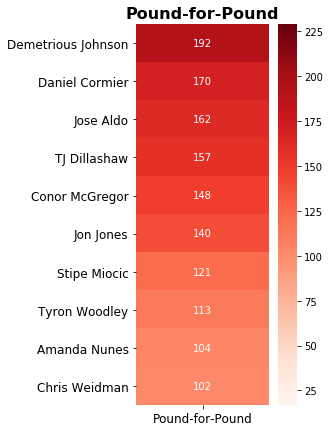

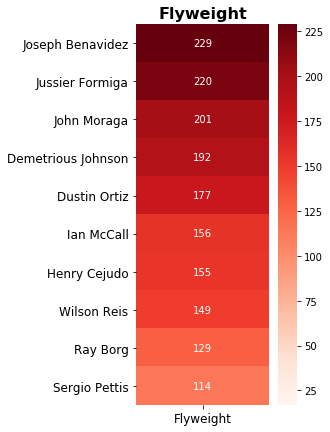

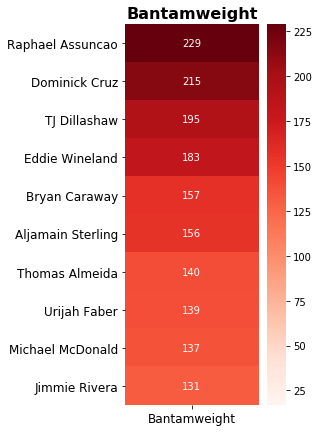

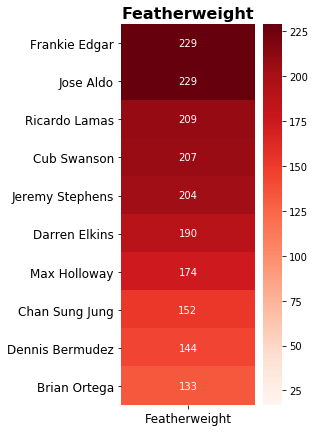

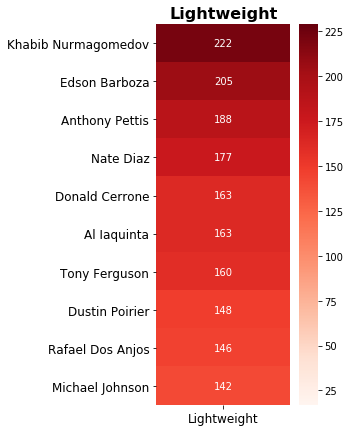

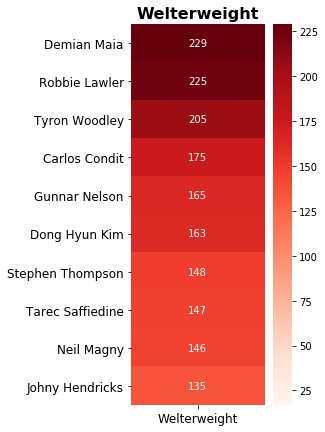

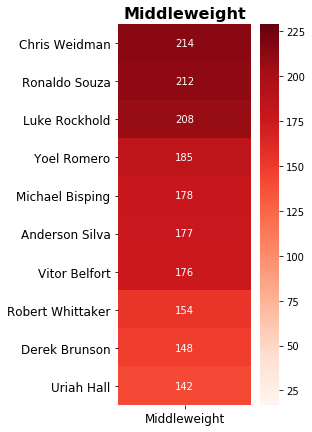

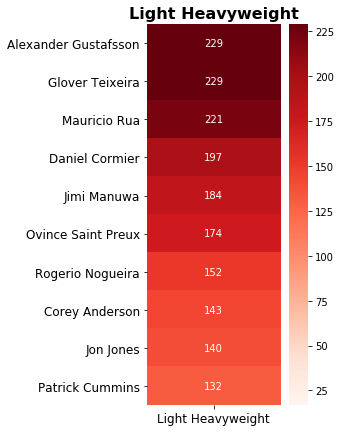

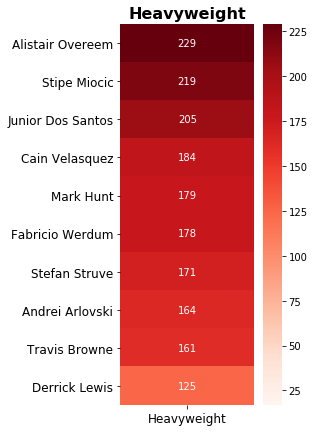

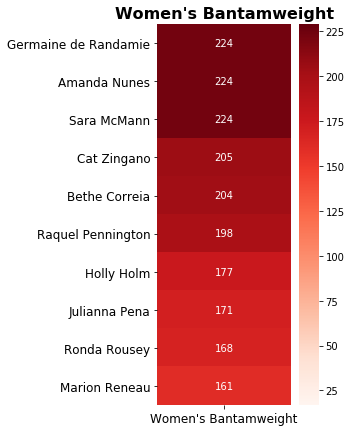

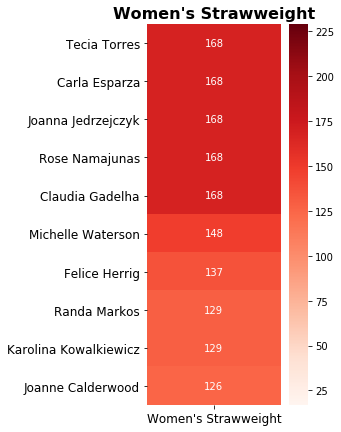

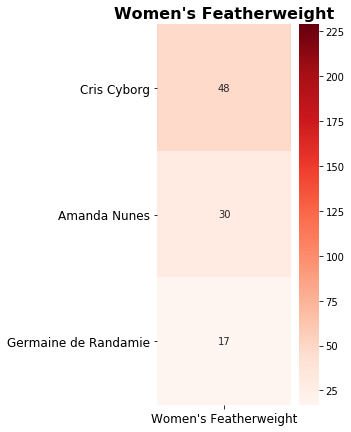

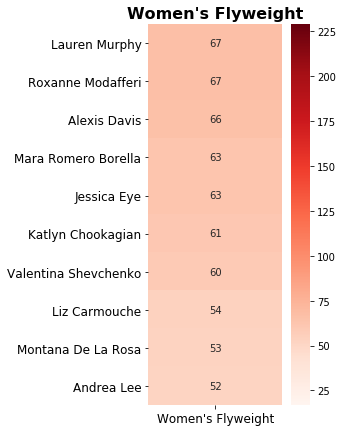

In [13]:
for z in range(len(top_fighter_lists)):
    temp_df = pd.DataFrame(top_fighter_lists[z])
    temp_df.columns = [weightclass_list[z]]
    #display(temp_df)
    fig, ax = plt.subplots(figsize=(3,7))
    sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='Reds', ax=ax, vmin=list_min, vmax=list_max)
    plt.yticks(rotation=0, fontsize=12)
    plt.title(weightclass_list[z], fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)

## What does the journey of these ranking mainstays look like?

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


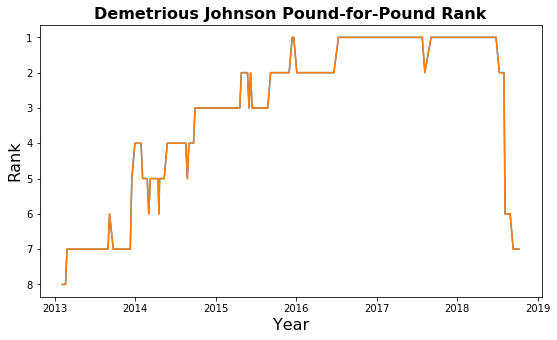

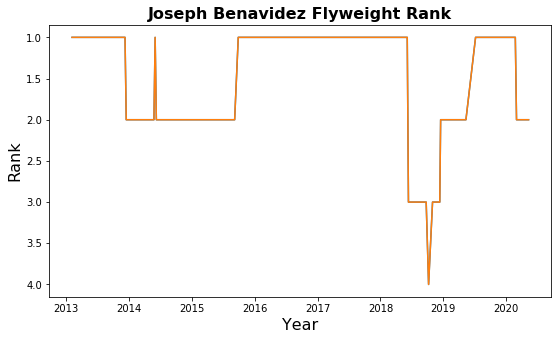

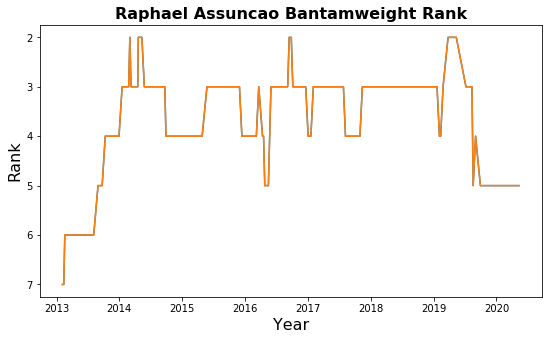

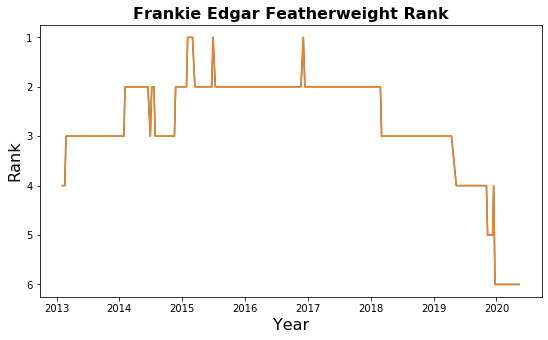

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


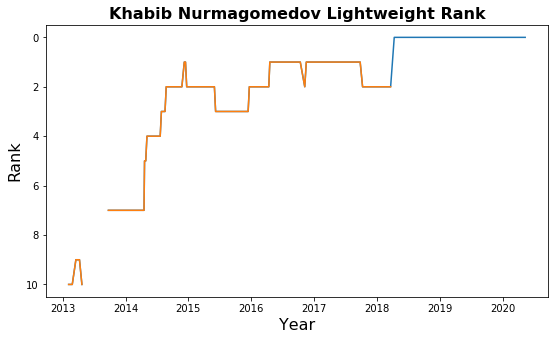

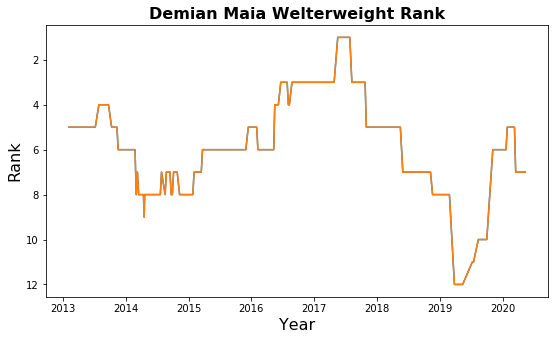

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


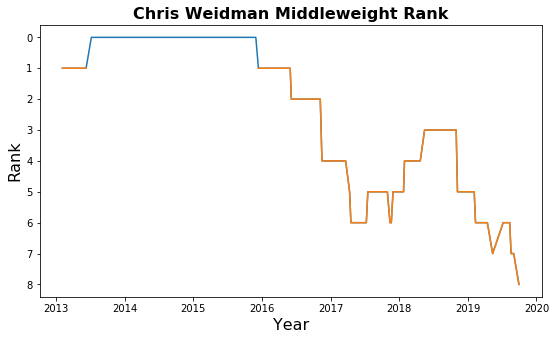

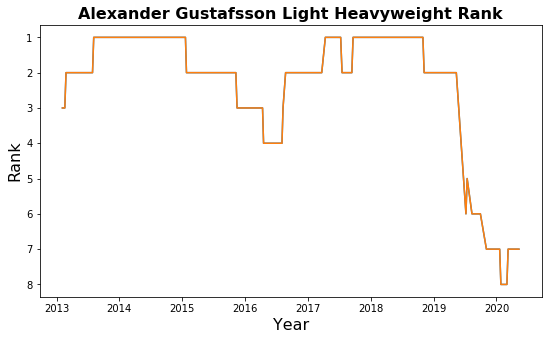

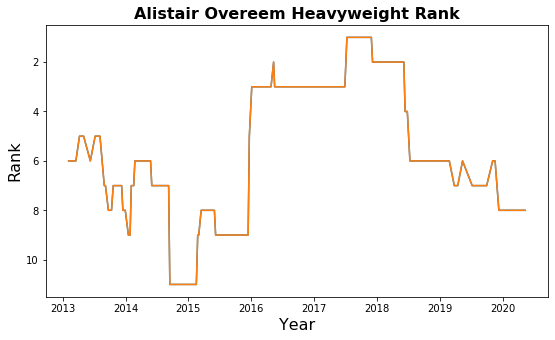

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


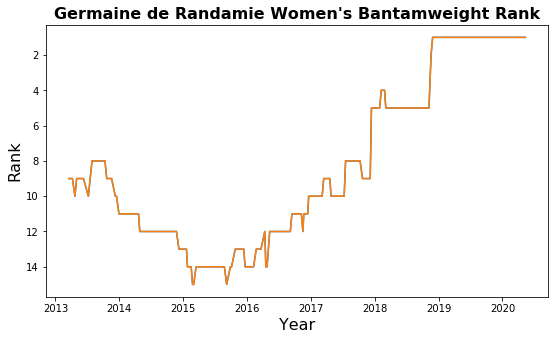

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


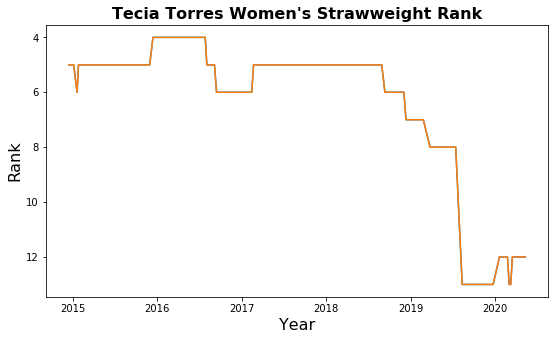

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


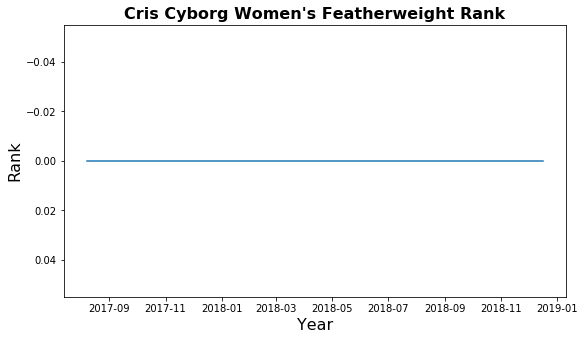

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


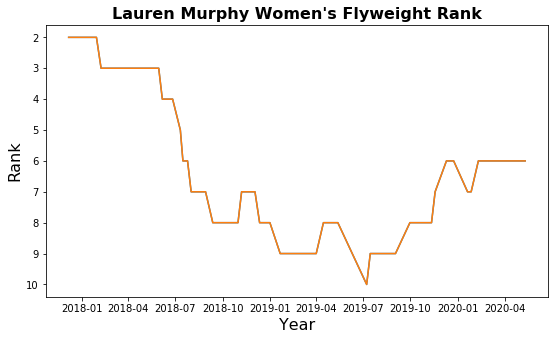

In [15]:



for z in range(len(weightclass_list)):
    wc = weightclass_list[z]
    f = top_fighter_lists[z].keys()[0]

    rank_list = []

    for d in date_list:
        #print(d)
        temp_df = df[(df['date']==d) & (df['fighter'] == f) & (df['weightclass'] == wc)]
        if (len(temp_df)) > 0:
            rank_list.append((temp_df['rank']).values[0])
        else:
            rank_list.append(np.nan)
    #print(f"{f} at {wc} rankings: ")
    #display(rank_list)
    
    rank_list = np.asarray(rank_list)
    lower = 0
    slower = np.ma.masked_where(rank_list < .5, rank_list)    
    fig, plt.figure(figsize=(9,5))
    
    plt.plot(date_list,  rank_list, date_list, slower)

    plt.gca().invert_yaxis()
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Rank', fontsize=16)
    plt.title(f'{f} {wc} Rank', fontweight='bold', fontsize=16)
    plt.show()

In [17]:
print(top_fighter_lists)

[Demetrious Johnson    192
Daniel Cormier        170
Jose Aldo             162
TJ Dillashaw          157
Conor McGregor        148
Jon Jones             140
Stipe Miocic          121
Tyron Woodley         113
Amanda Nunes          104
Chris Weidman         102
Name: fighter, dtype: int64, Joseph Benavidez      229
Jussier Formiga       220
John Moraga           201
Demetrious Johnson    192
Dustin Ortiz          177
Ian McCall            156
Henry Cejudo          155
Wilson Reis           149
Ray Borg              129
Sergio Pettis         114
Name: fighter, dtype: int64, Raphael Assuncao     229
Dominick Cruz        215
TJ Dillashaw         195
Eddie Wineland       183
Bryan Caraway        157
Aljamain Sterling    156
Thomas Almeida       140
Urijah Faber         139
Michael McDonald     137
Jimmie Rivera        131
Name: fighter, dtype: int64, Frankie Edgar      229
Jose Aldo          229
Ricardo Lamas      209
Cub Swanson        207
Jeremy Stephens    204
Darren Elkins      190
Max 

# What does rank movement in a single weight class look like?

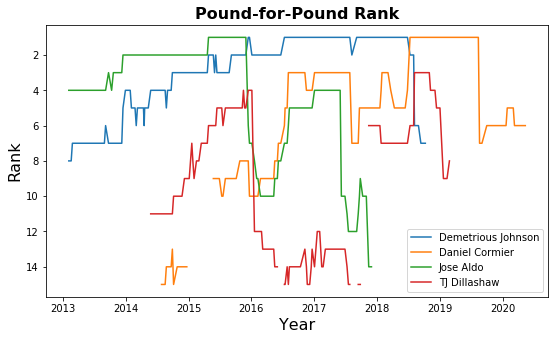

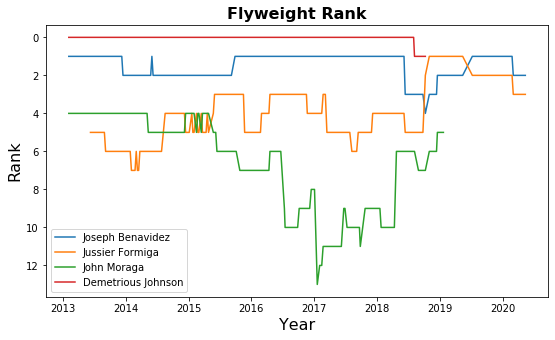

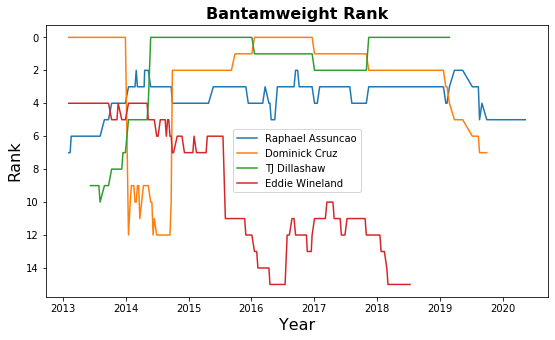

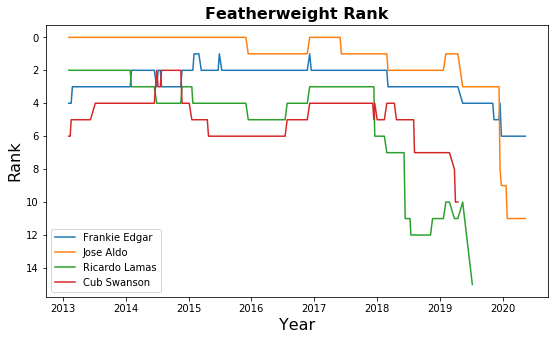

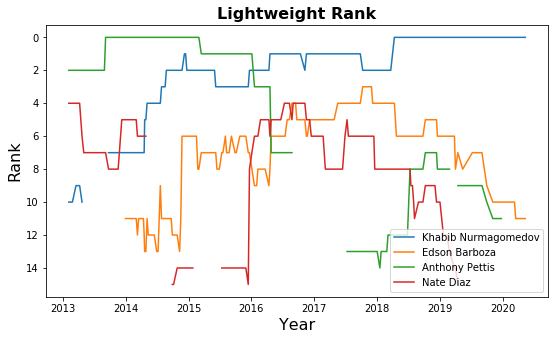

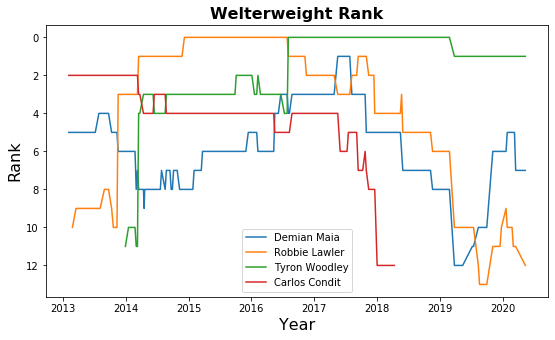

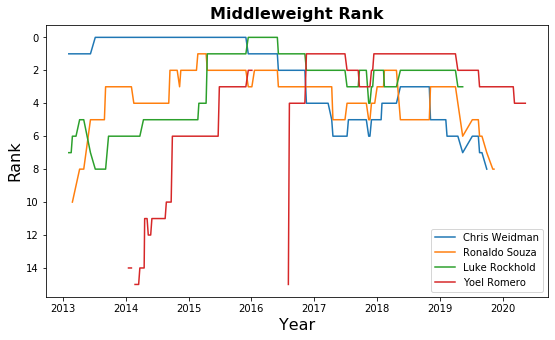

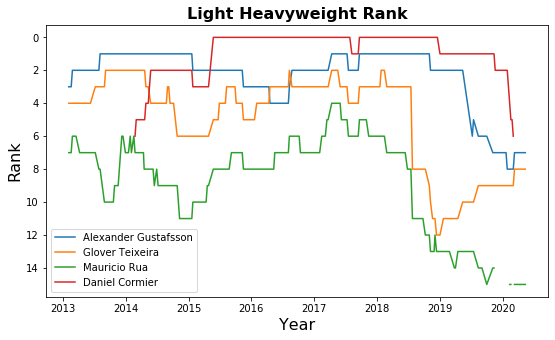

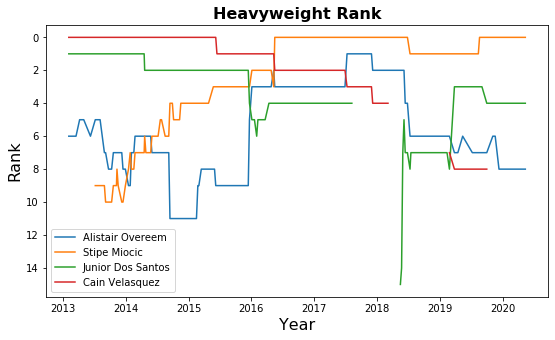

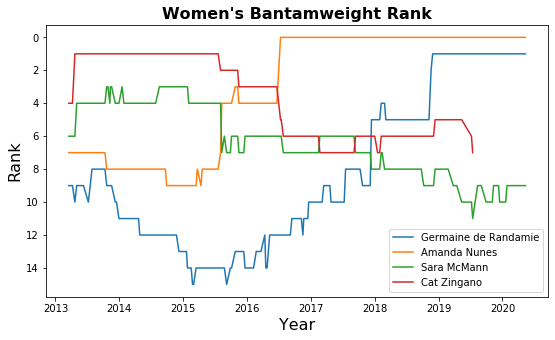

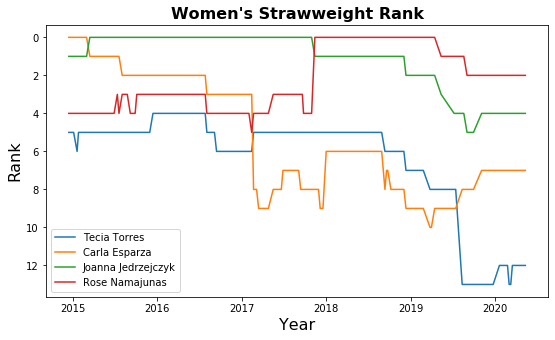

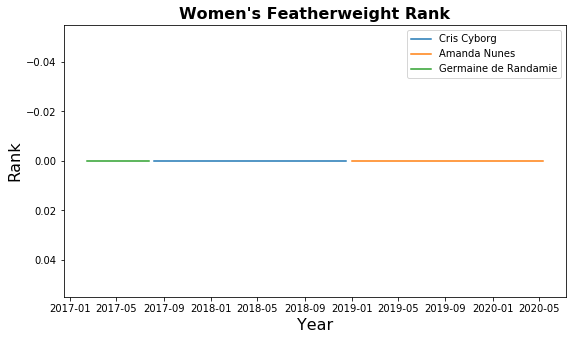

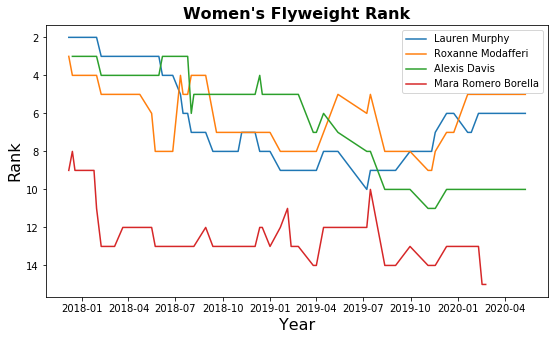

In [41]:
for z in range(len(weightclass_list)):
    wc = weightclass_list[z]

    if len(top_fighter_lists[z]) > 3:
        fighters = [top_fighter_lists[z].keys()[0], top_fighter_lists[z].keys()[1], top_fighter_lists[z].keys()[2], 
               top_fighter_lists[z].keys()[3]]
    else:
        fighters = [top_fighter_lists[z].keys()[0], top_fighter_lists[z].keys()[1], top_fighter_lists[z].keys()[2]]

        
    rank_list_list = []
    
    for f in fighters:
        rank_list = []
        for d in date_list:
            temp_df = df[(df['date']==d) & (df['fighter'] == f) & (df['weightclass'] == wc)]
            if (len(temp_df)) > 0:
                rank_list.append((temp_df['rank']).values[0])
            else:
                rank_list.append(np.nan)
        #display(rank_list)
        rank_list_list.append(rank_list)
    #print(f"Fighters: {fighters}")
    #display(rank_list_list)
    fig, plt.figure(figsize=(9,5))
    if len(top_fighter_lists[z]) > 3:                    
        plt.plot(date_list,  rank_list_list[0], date_list,  rank_list_list[1], date_list,  rank_list_list[2],
             date_list,  rank_list_list[3])
    else:
        plt.plot(date_list,  rank_list_list[0], date_list,  rank_list_list[1], date_list,  rank_list_list[2])
                    
    plt.gca().invert_yaxis()
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Rank', fontsize=16)
    plt.title(f'{wc} Rank', fontweight='bold', fontsize=16)
    plt.legend(fighters)
    plt.show()    